In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("weight-height.csv")

In [52]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [53]:
Q1 = df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)

In [54]:
IQR = Q3-Q1
IQR

np.float64(51.35147356318197)

In [55]:
lower_limit = Q1 - 1.5*IQR 
upper_limit = Q3 + 1.5*IQR 

In [56]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [57]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]
df_no_outlier = df[(df.Weight>lower_limit)&(df.Weight<upper_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f65bf5350d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f65bf535640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f65bf534fb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f65bf535b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f65bf532840>],
 'means': []}

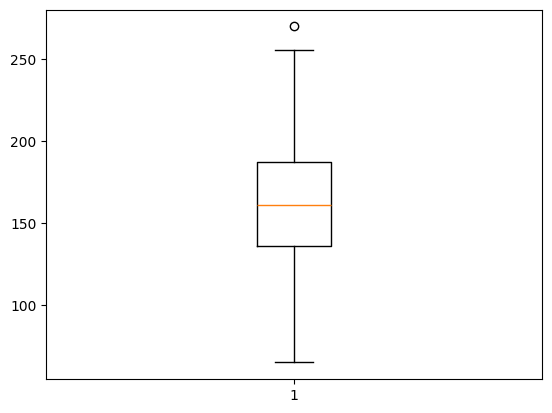

In [58]:
plt.boxplot(df.Weight)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f65bf53ec90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f65bf53f1a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f65bf53e9f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f65bf53f770>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f65bf531520>],
 'means': []}

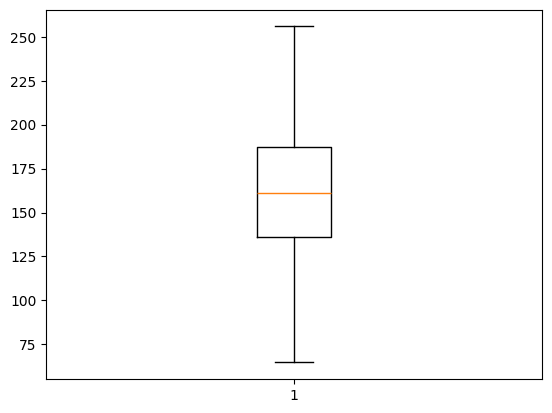

In [59]:
plt.boxplot(df_no_outlier.Weight)

In [60]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler_MinMax = MinMaxScaler()
scaler_standarize = StandardScaler()

features = df[['Height','Weight']]

normalize = scaler_MinMax.fit_transform(features)
df_normalize = pd.DataFrame(
    normalize,
    columns=['Height_normalize','weight_normalize']
)
df_normalize.head()

,Height_normalize,weight_normalize
0,0.791728,0.863139
1,0.586958,0.475476
2,0.802364,0.721131
3,0.706182,0.756699
4,0.631424,0.689999


In [62]:
standarize_data = scaler_standarize.fit_transform(features)
df_Standard = pd.DataFrame(
    standarize_data,
    columns=['Height_standarize','weight_standarize']
)
df_Standard.head()

,Height_standarize,weight_standarize
0,1.944061,2.505797
1,0.627537,0.027101
2,2.012443,1.597806
3,1.394060,1.825222
4,0.913421,1.398750
